[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/azad-academy/MLBasics-SVM/blob/main/ml-svm.ipynb)

# Support Vector Machines
#### Author : J. Rafid Siddiqui (jrs@azaditech.com)


## Pre-requisites and Imports

In [ ]:
!pip install scikit-learn

In [1]:
import sklearn
from sklearn.datasets import *
from sklearn import svm
from sklearn.model_selection import train_test_split

import sys
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import math
import matplotlib

# Defining Supporting Functions

In [2]:
def plot_data(X,Y,model=None,canvas=None,xtitle=None,ytitle=None,colors=None,plt_title=None,color_map=plt.cm.RdBu):
        
    
    if(colors is None):
        colors = np.random.rand(max(Y)+1,3)
    
        
    if(canvas is None):
        fig, ax = plt.subplots(figsize=(11,8))
    else:
        ax = canvas
        ax.cla()
    
    if(plt_title is not None):
        ax.set_title(plt_title)

    
    
    if(model is not None):  #Plotting the decision boundary
        h = .05 #mesh grid resolution
        
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=color_map, alpha=.8)
    
    if(X.shape[1]>2):
        ax.scatter3D(X[:,0],X[:,1],X[:,2],color=np.array(colors)[Y],alpha=0.6)  #plotting the 3D points
        ax.grid(False)
    else:
        ax.scatter(X[:,0],X[:,1],color=np.array(colors)[Y],alpha=0.6)  #plotting the 2D points
            
    if(xtitle is not None):
        ax.set_xlabel(xtitle,fontweight='bold',fontsize=16)
    
    if(xtitle is not None):
        ax.set_ylabel(ytitle,fontweight='bold',fontsize=16)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Data Preparation

In [3]:
# Generating 2D Linearly Separable data for classification
rstate = np.random.RandomState(10)
X, Y = make_classification(30, n_features=2, n_redundant=0, n_classes=2, random_state=rstate, class_sep=2)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.3, random_state=10)

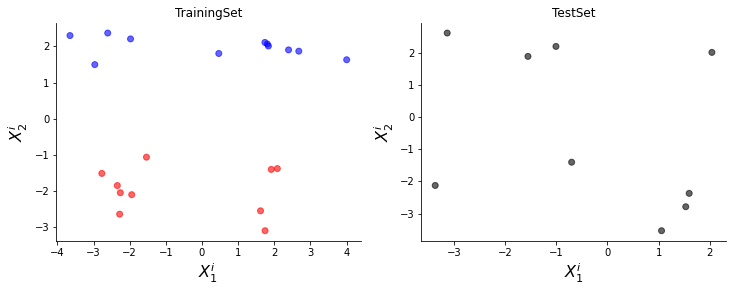

In [4]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
plot_data(X_train1,Y_train1,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="TrainingSet",canvas=axes[0])
plot_data(X_test1,np.zeros((len(X_test1),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[1])

In [5]:
#Generating Non-Linear Data
rstate = np.random.RandomState(10)
X, Y = sklearn.datasets.make_moons(n_samples=1000,noise=0.1,random_state=rstate)

#Splitting the data into train and test sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.3, random_state=10)

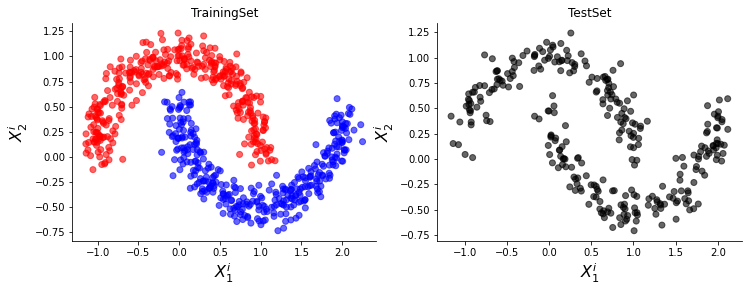

In [6]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
plot_data(X_train2,Y_train2,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="TrainingSet",canvas=axes[0])
plot_data(X_test2,np.zeros((len(X_test2),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[1])

In [7]:
# Generating 3D Linearly Separable data for classification
rstate = np.random.RandomState(1)
X, Y = make_classification(30, n_features=3, n_redundant=0, n_classes=2, random_state=rstate, class_sep=2)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=0.3, random_state=10)

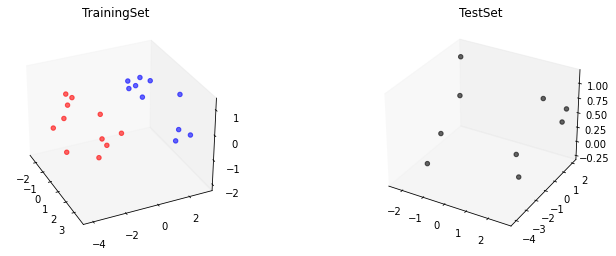

In [8]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.view_init(30,-25)
ax2 = fig.add_subplot(1,2,2,projection='3d')
plot_data(X_train3,Y_train3,colors=['r','b'],plt_title="TrainingSet",canvas=ax1)
plot_data(X_test3,np.zeros((len(X_test3),),dtype=int),colors=['k'],plt_title="TestSet",canvas=ax2)

# Support Vector Machines


\begin{equation}
\color{Red} {\min_{\alpha_i} \mathcal{L}(\alpha_i) = \sum_{i} \alpha_i - \frac{1}{2} \sum_{i} \alpha_i\alpha_jy_iy_j(x_i.x_j) }\\  \\
\color{Red} { w = \sum_i\alpha_iy_ix_i \quad, } \\ 
\color{Red} { \sum_i\alpha_iy_i = 0 }\\
\color{Red} {for \quad \alpha_i\ge0 \quad y_i = \pm 1} \\ 
\end{equation}



## Linear SVM on Linearly Separable Data

In [9]:
lsvm1 = svm.SVC(kernel='linear').fit(X_train1,Y_train1)
Y_pred = lsvm1.predict(X_train1)

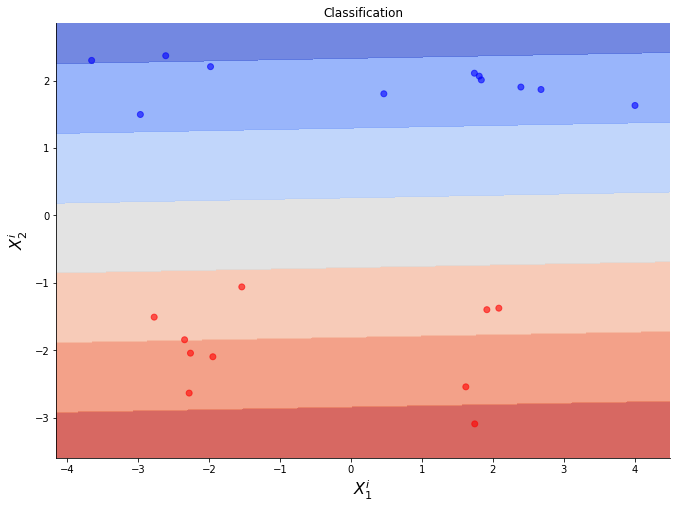

In [10]:
cmap = matplotlib.cm.get_cmap('coolwarm_r')
plot_data(X_train1,Y_pred,model=lsvm1,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="Classification",color_map=cmap)

# Margin, Hyperplanes and Supporting Vectors

Text(4.0045849921347845, -1.3274774429495815, '$H_2$')

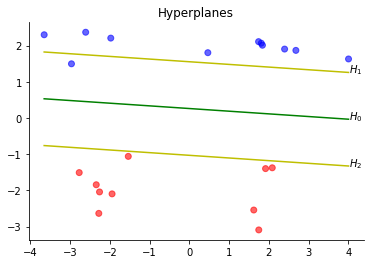

In [12]:
w = lsvm1.coef_[0] #learned weights
b = lsvm1.intercept_[0] # bias

xx = np.linspace(min(X_train1[:,0]),max(X_train1[:,0]),100)  #sample values for hyperplane
H0 = -w[0]/b*xx - (b/w[1])    #Computing the Hyperplane in 2D

fig,ax = plt.subplots(1,1,figsize=(6,4))
plot_data(X_train1,Y_train1,colors=['r','b'],plt_title="Hyperplanes",color_map=cmap,canvas=ax)
#plotting the hyperplane
ax.plot(xx,H0,'g')
ax.text(xx[-1],H0[-1],'$H_0$')
#Computing the Support Vectors
margin = 1/np.linalg.norm(w)     # Margin is the norm of the coefficients
w_hat = w/np.linalg.norm(w)      #Unit vector giving the direction of the hyperplane

H1 = H0 + w_hat[1]*margin #Support vector for points above the hyperplane
H2 = H0 - w_hat[1]*margin #Support vector for points above the hyperplane

#plotting the support vectors
ax.plot(xx,H1,'y')
ax.text(xx[-1],H1[-1],'$H_1$')
ax.plot(xx,H2,'y')
ax.text(xx[-1],H2[-1],'$H_2$')

# Linear SVM on 3D Data

In [13]:
X = X_train3
Y = Y_train3
lsvm3d = svm.SVC(kernel='linear').fit(X,Y)
Y_pred = lsvm3d.predict(X)

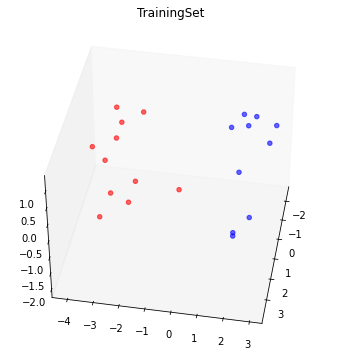

In [14]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.view_init(40,10)
plot_data(X,Y_pred,colors=['r','b'],plt_title="TrainingSet",canvas=ax)

## Hyperplane(s) in 3D

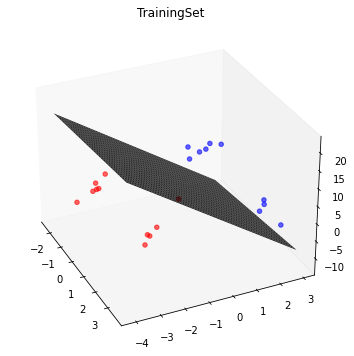

In [15]:
w = lsvm3d.coef_[0] #learned weights
d = lsvm3d.intercept_[0] # bias

xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:, 0].max(), 0.03),np.arange(X[:,1].min(), X[:, 1].max(), 0.03))
H0 = -w[0]/w[2]*xx -w[1]/w[2]*yy - (d/w[2])    #Computing the Hyperplane in 3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.view_init(30,-25)
plot_data(X,Y_pred,colors=['r','b'],plt_title="TrainingSet",canvas=ax) 
                                                            
ax.plot_surface(xx,yy,H0,color='k',alpha=0.9)

# Linear SVM on Non-Linear Data

In [16]:
lsvm2 = svm.SVC(kernel='linear').fit(X_train2,Y_train2)
Y_test2 = lsvm2.predict(X_test2)

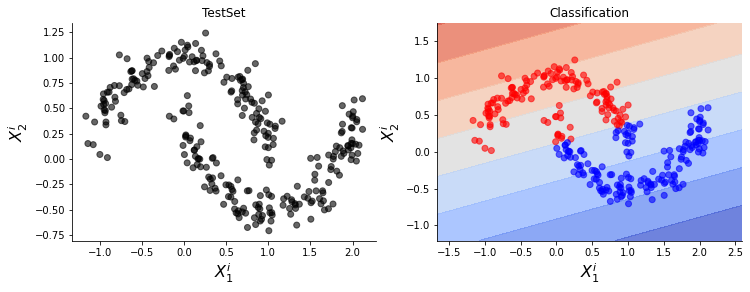

In [17]:
cmap = matplotlib.cm.get_cmap('coolwarm_r')
fig,axes = plt.subplots(1,2,figsize=(12,4))
plot_data(X_test2,np.zeros((len(X_test2),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[0])
plot_data(X_test2,Y_test2,model=lsvm2,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="Classification",canvas=axes[1],color_map=cmap)

## Non-Linear SVM with Gaussian Kernel

In [18]:
nlsvm = svm.SVC(kernel='rbf').fit(X_train2,Y_train2)
Y_test2 = nlsvm.predict(X_test2)

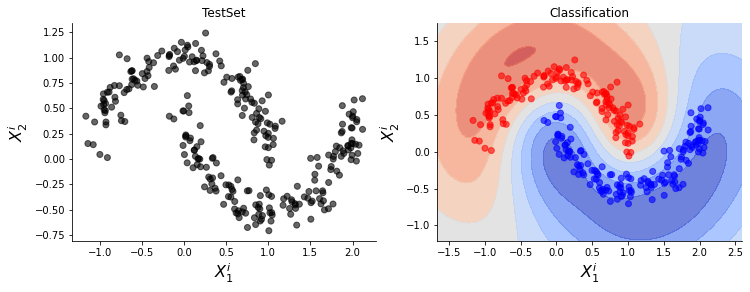

In [19]:
cmap = matplotlib.cm.get_cmap('coolwarm_r')
fig,axes = plt.subplots(1,2,figsize=(12,4))
plot_data(X_test2,np.zeros((len(X_test2),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[0])
plot_data(X_test2,Y_test2,model=nlsvm,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="Classification",canvas=axes[1],color_map=cmap)

## Non-Linear SVM with Polynomial Kernel

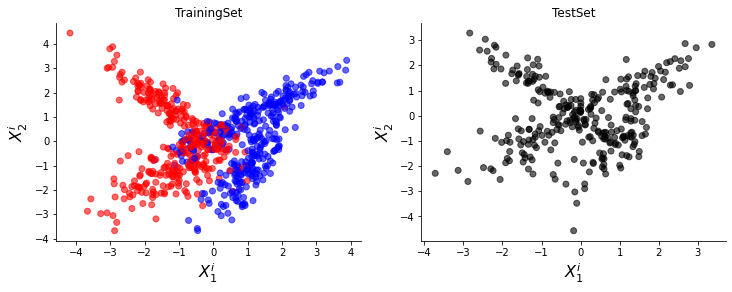

In [20]:
# Generate Random data for classification
rstate = np.random.RandomState(10)
X, Y = make_classification(1000, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2,random_state=rstate)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
fig,axes = plt.subplots(1,2,figsize=(12,4))
plot_data(X_train,Y_train,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="TrainingSet",canvas=axes[0])
plot_data(X_test,np.zeros((len(X_test),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[1])

In [21]:
nlsvm_poly = svm.SVC(kernel='poly').fit(X_train,Y_train)
Y_test = nlsvm_poly.predict(X_test)

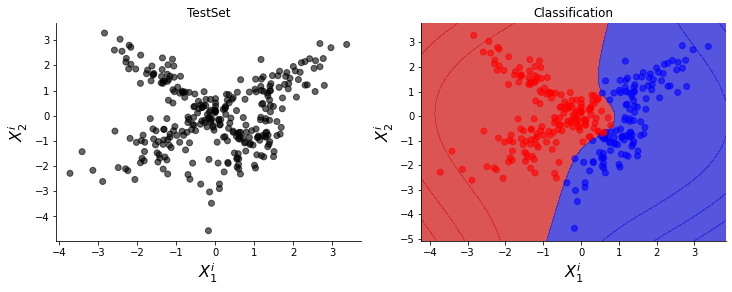

In [22]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
cmap = ListedColormap(['#d42b2b', '#2a2ad5'])
plot_data(X_test,np.zeros((len(X_test),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[0])
plot_data(X_test,Y_test,model=nlsvm_poly,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="Classification",canvas=axes[1],color_map=cmap)